<a href="https://colab.research.google.com/github/BlackHole3344/Deep-learning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense , Flatten

In [3]:
(X_train , y_train ) , (X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape , y_train[99]

((60000, 28, 28), 1)

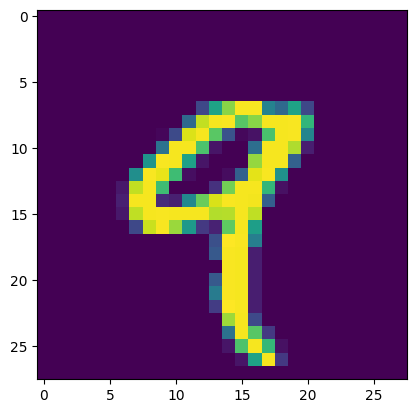

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])

In [ ]:
X_train[4]

In [8]:
# we need to scale down the pixel values between 0 to 1 for better convergence (to do that we are dividing the values by 255 )
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0].shape

(28, 28)

In [13]:
# as our data is in 28x28 but out input layer of neural network will be working with 1 , 784
# so we have to flatten the data into 1 , 784
model = Sequential()
# structure of neural network

model.add(Flatten(input_shape = (28 ,28)))
# 1st hidden layer
model.add(Dense(128 , activation = "relu"))
# output layert
model.add(Dense(10 , activation = "softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer= "Adam")

In [16]:
model.fit(X_train , y_train , epochs=10 , validation_split= 0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2780 - val_loss: 0.1545
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1259 - val_loss: 0.1168
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0879 - val_loss: 0.0965
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0638 - val_loss: 0.1013
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0505 - val_loss: 0.0873
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0381 - val_loss: 0.0901
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0327 - val_loss: 0.0829
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0243 - val_loss: 0.0909
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0209 - val_loss: 0.0881
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.016

In [20]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [21]:
# y_prob will be returning the probability of each digit in a array of 10
# so we need the max value of that array
y_prob.shape

(10000, 10)

In [27]:
# will be returing the index of max value in a array
y_pred = y_prob.argmax(axis = 1 )

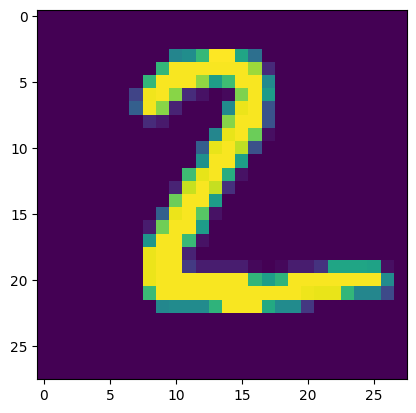

In [26]:
plt.imshow(X_test[1])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9757

In [29]:
# loss vs epochs
plt.plot(history.history["loss"])

NameError: name 'history' is not defined